<a href="https://colab.research.google.com/github/max-sorokin-ft/Weather_App/blob/main/HW01_447_Maxim_Sorokin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

```
     ___                         ___           ___     
     /__/\                       /  /\         /  /\    
    |  |::\                     /  /:/_       /  /:/_   
    |  |:|:\    ___     ___    /  /:/ /\     /  /:/ /\  
  __|__|:|\:\  /__/\   /  /\  /  /:/ /:/_   /  /:/ /::\
 /__/::::| \:\ \  \:\ /  /:/ /__/:/ /:/ /\ /__/:/ /:/\:\
 \  \:\~~\__\/  \  \:\  /:/  \  \:\/:/ /:/ \  \:\/:/~/:/
  \  \:\         \  \:\/:/    \  \::/ /:/   \  \::/ /:/
   \  \:\         \  \::/      \  \:\/:/     \__\/ /:/  
    \  \:\         \__\/        \  \::/        /__/:/   
     \__\/                       \__\/         \__\/    
  
```

# AOSC 447: Machine Learning in Earth Science
# Prof. Xin-Zhong Liang
# **Assignment Submission Guidelines**

### 📋 **Instructions**

1. **Edit Directly:**  
   Make changes directly in the provided file. **DO NOT** download and re-upload it, as this may cause submission issues.
   You can work on your own copy, but later on you must fill your into this online shared one.

2. **Do Not Modify Cells:**  
   **DO NOT** add or delete any cells. Altering the notebook’s structure may result in a loss of points.

3. **Verify Your Code:**  
   Before submission, ensure that all cells run correctly:  
   - Restart the kernel and run all cells:  
     **`Runtime → Restart and run all`** (found in the menu bar).

4. **Execution Time Limits:**  
   - The total runtime on Colab **must not exceed 56 seconds**.  
   - If your code takes **more than 5 minutes**, optimize it before submission.  
   - Code that runs for **over 10 minutes will not be graded**.

5. **Remove Placeholders:**  
   Delete all instances of `"notimplemented"` before submitting.  
   - **Zero points** will be awarded for any incomplete cells.

6. **Submission:**  
   After completing the assignment:  
   - Complete the survey in the final cell to officially submit your work.  
   - You’ll receive a **confirmation email** upon successful submission.     

---





## **⚠️ IMPORTANT: Run the First Cell Before Proceeding!**

Before starting any tasks, you **MUST** run the first cell to:

✅ **Download necessary data files**  
✅ **Install the required MLES library**  
✅ **Import essential dependencies**  

---

### 🚀 **How to Run the Cell:**
1. **Click the play button ▶️** to execute the cell.
2. **Wait until the download completes** before moving forward.

---

### ✅ **Once the Cell is Successfully Run:**
- You **should see terps ready go** confirming the download and setup.


If you encounter any problems, **restart your kernel and try again**.

In [ ]:
#@title Run the First Cell Before Proceeding! {display-mode: "form"}
import this
import time
import getpass
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os import path
from subprocess import check_call
from IPython.core.magic import register_cell_magic

@register_cell_magic
def playground(line, cell):
    if eval(line):
        get_ipython().ex(cell)
    else:
        return

tot_start = time.time()
user = getpass.getuser()
student = True if user !="chaosun" else False


from subprocess import check_call
user = getpass.getuser()

if user == "chaosun":
    cmd = "wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Iv5iwKW1F4O1Iy5cEb_ar-XWu6zMm_A1' -O mles.cpython-311-darwin.so"
    check_call(cmd,shell=True)
else: #students
    from google.colab import drive
    drive.mount('/content/drive')
    cmd = "wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-1ReorCkM7Pd9S6DVnDaugFi79htpYKT' -O mles.cpython-311-x86_64-linux-gnu.so"
    check_call(cmd,shell=True)
    cmd = "wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1--m6An4QpmlTFtcR347qJjvhKoGKeaVH' -O mles.cpython-310-x86_64-linux-gnu.so"
    check_call(cmd,shell=True)


if user == "chaosun":
    import os
    target = "./states_ref.parquet"
    if not os.path.exists(target):
        os.symlink("/Users/chaosun/states_ref.parquet",target)
else:
    file_id = "1IgY_2V51WXowSnpYvH1wgrKYRjvCKcVW"
    cmd = f"wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id={file_id}' -O states_ref.parquet"
    check_call(cmd,shell=True)


import mles



def checkit(fun, nmax, formax):
    import inspect, re, ast

    # Get the source lines and the starting line number
    source_lines, starting_lineno = inspect.getsourcelines(fun)
    source = "".join(source_lines)

    # Parse the source into an AST
    tree = ast.parse(source)
    func_node = tree.body[0]

    # Determine the first line of the function body (skip header & docstring, if any)
    if func_node.body:
        first_stmt = func_node.body[0]
        # If the first statement is a docstring, skip it.
        if (isinstance(first_stmt, ast.Expr) and
            isinstance(first_stmt.value, (ast.Str, ast.Constant)) and
            isinstance(first_stmt.value.value, str)):
            # If there is more than just a docstring, use the next statement's line number.
            if len(func_node.body) > 1:
                first_body_line = func_node.body[1].lineno
            else:
                # Only a docstring exists; nothing else.
                first_body_line = first_stmt.lineno + 1
        else:
            first_body_line = first_stmt.lineno
    else:
        # No body: unlikely, but set it past the source
        first_body_line = starting_lineno + len(source_lines)

    # Calculate the index (zero-based) into source_lines where the body begins.
    body_index = first_body_line - starting_lineno
    body_lines = source_lines[body_index:]

    # Remove inline comments and trailing whitespace,
    # and filter out blank lines.
    code_lines = []
    for line in body_lines:
        # Remove inline comments (everything after a '#' is stripped)
        line_no_comment = re.sub(r'#.*', '', line)
        if line_no_comment.strip():
            code_lines.append(line_no_comment.rstrip())

    # Count the number of code lines, occurrences of 'for', and max line length.
    nlines = len(code_lines)
    nfor = len(re.findall(r'\bfor\b', "\n".join(code_lines)))
    max_len = max((len(line) for line in code_lines), default=0)

    # Check the constraints.
    assert nlines <= nmax, f"❌ Too many lines: {nlines} > {nmax}"
    assert nfor <= formax, f"❌ Too many 'for' loops: {nfor} > {formax}"
    assert max_len <= 80, f"❌ A line is too long: {max_len} > 80"
    print("✅ Your function passes all constraints!")


The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
Mounted at /content/drive

  ________________  ____  _____    ____  _________    ______  __
 /_  __/ ____/ __ \/ __ \/ ___/   / __ \/ ____/   |

## **📌 Background: Where This Data Comes From**
The dataset comes from the **U.S. Environmental Protection Agency (EPA)'s Air Quality System (AQS) Database**.  
It contains **daily air quality measurements** for various pollutants across the United States from **1986 to 2019**.



---

## **🚀 Task 0: Load the Preprocessed Data**
You are **NOT** required to process raw data manually. Instead, you will use the **preprocessed DataFrame (`df_states`)**. This dataset has already been **cleaned and aggregated**, ensuring:
- **Consistent column naming**
- **State-level daily averages**
- **Removal of invalid or missing records**

Please just run the following cell.



In [ ]:
# do NOT modify this cell, run it to load the data!
df_states = pd.read_parquet("states_ref.parquet")
df_states.head()

,Date,State,Parameter,Mean,AQI
0,1986-01-01,Alabama,Carbon monoxide,1.014474,39.25
1,1986-01-01,Alabama,PM10 Total 0-10um STP,40.000000,37.00
2,1986-01-01,Alabama,Sulfur dioxide,6.751984,32.25
3,1986-01-01,Alaska,Carbon monoxide,0.753290,12.75
4,1986-01-01,Alaska,PM10 Total 0-10um STP,17.500000,16.50


### ✅ **Your Starting Point**  
At this stage, you should have a DataFrame df_states that matches the **example below**.


### 🔍 **Expected Output (`df_states.head()`)**
|    | Date       | State   | Parameter             |     Mean |   AQI |
|---:|:-----------|:--------|:----------------------|---------:|------:|
|  0 | 1986-01-01 | Alabama | Carbon monoxide       |  1.01447 | 39.25 |
|  1 | 1986-01-01 | Alabama | PM10 Total 0-10um STP | 40       | 37.00 |
|  2 | 1986-01-01 | Alabama | Sulfur dioxide        |  6.75198 | 32.25 |
|  3 | 1986-01-01 | Alaska  | Carbon monoxide       |  0.75329 | 12.75 |
|  4 | 1986-01-01 | Alaska  | PM10 Total 0-10um STP | 17.5     | 16.50 |

From now on, column names will be referred to as **features**.

**Interested in data preparation?**  
If you’d like to understand how this dataset was cleaned and structured, check out **EX3**, which covers the full preprocessing workflow.

Good luck, and happy analyzing! 🐢📊

# **📊 Task 1: Explore and Visualize Data**
```
               _ _                  __             
__      ___ __(_) |_ ___    __ _   / _|_   _ _ __  
\ \ /\ / / '__| | __/ _ \  / _` | | |_| | | | '_ \
 \ V  V /| |  | | ||  __/ | (_| | |  _| |_| | | | |
  \_/\_/ |_|  |_|\__\___|  \__,_| |_|  \__,_|_| |_|
                                                   
```
In this task, you will **analyze and visualize air quality data** by implementing a function to compute the **mode** (most frequent value) for each pollutant.

---

## **📌 Task 1.1: Implement `mode_by_pollution()`**
You need to **write a function** called `mode_by_pollution()` that calculates the **mode** for a selected feature (`"AQI"` or `"Mean"`) across different pollutants.

### **🔧 Function Definition**
```python
def mode_by_pollution(df_states, vname, pltbar=True):
    """
    Compute the mode value of the selected feature for each pollutant and optionally visualize the results.

    Args:
        df_states (DataFrame): The dataset containing daily state-level air quality data.
        vname (str): The feature to analyze, either "AQI" or "Mean".
        pltbar (bool): If True, generates a bar plot (default: True).

    Returns:
        DataFrame: A DataFrame containing the mode value for each pollutant.
    """
    # YOUR CODE HERE
```

---

### **📥 Function Arguments**
1. **`df_states`** → A Pandas DataFrame containing daily air quality measurements for each U.S. state.
2. **`vname`** → A string indicating the feature to analyze (`"AQI"` or `"Mean"`).
3. **`pltbar`** (optional) → A boolean indicating whether to generate a **bar plot** (**default: `True`**).

---

### **📤 Expected Output**
Your function should return a **DataFrame** with the most frequently occurring (`mode`) value of `"AQI"` or `"Mean"` for each pollutant.

If `pltbar=True`, the function should generate a **bar plot** with:
- **X-axis** → Pollutants  
- **Y-axis** → Mode values  

---

## **⚠️ Important Constraints**
✅ **Do NOT use loops** (Use vectorized Pandas/Numpy methods).  
✅ **Your code should be ≤ 10 lines long**.  
✅ **Execution time should be ≤ 5 seconds**.  



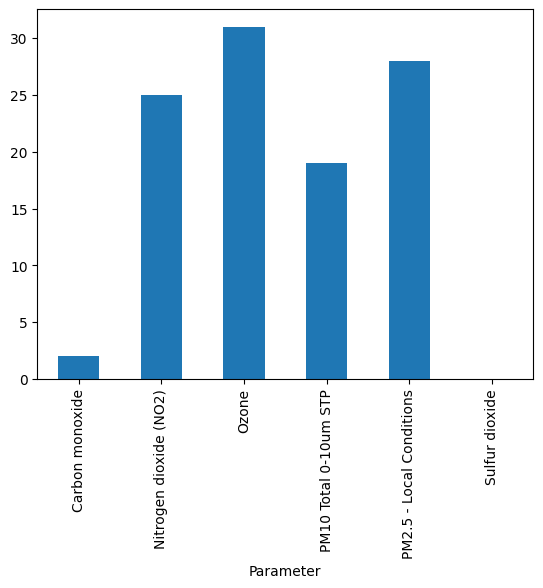

In [ ]:
#@title Demo Cell, don't edit me, check your outcome with me! {display-mode: "form"}
df_mode_by_pollution = df_states.HW1.mode_by_pollution("AQI")

In [ ]:
%%playground student
### This is your playground, do whatever test at here!

### This is your playground, do whatever test at here!

In [ ]:
def mode_by_pollution(df,vname:str,pltbar:bool=True):
    """
    Compute the mode value of the selected feature for each pollutant and optionally visualize the results.

    Args:
        df_states (DataFrame): The dataset containing daily state-level air quality data.
        vname (str): The feature to analyze, either "AQI" or "Mean".
        pltbar (bool): If True, generates a bar plot (default: True).

    Returns:
        DataFrame: A DataFrame containing the mode value for each pollutant.
    """
    df_mode = df.groupby('Parameter')[vname].apply(lambda x: x.mode().iloc[0])
    if pltbar == True:
      plt.bar(df_mode.index, df_mode.values)
      plt.xlabel('Parameter')
      plt.xticks(rotation=90)
    # raise NotImplementedError()
    return df_mode.to_frame()


checkit(mode_by_pollution,nmax=10,formax=0)

✅ Your function passes all constraints!


### Task 1.1 grading section, **<font color='red'>DO NOT</font>** edit me, answer in the above cell!

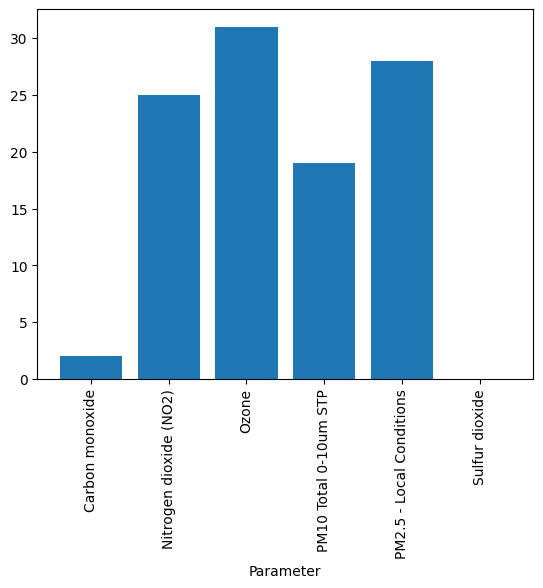

In [ ]:
#@title Grading Cell, don't edit me, otherwise you would have to input all code by yourself again! {display-mode: "form"}
with mles.clock_ticking(5):
    df_mode_by_pollution = mode_by_pollution(df_states,"AQI")

In [ ]:
#@title Grading Cell, don't edit me, otherwise you would have to input all code by yourself again! {display-mode: "form"}
checkit(mode_by_pollution,nmax=10,formax=0)

✅ Your function passes all constraints!


# **📊 Task 1.2: Mean Analysis by State**
```
               _ _                  __             
__      ___ __(_) |_ ___    __ _   / _|_   _ _ __  
\ \ /\ / / '__| | __/ _ \  / _` | | |_| | | | '_ \
 \ V  V /| |  | | ||  __/ | (_| | |  _| |_| | | | |
  \_/\_/ |_|  |_|\__\___|  \__,_| |_|  \__,_|_| |_|
                                                   
```

In this task, you will **analyze air quality data across states** by computing the **mean** of a selected feature (`"AQI"` or `"Mean"`) for a specific pollutant.

You will **implement** a function called `mean_by_state()` to perform this analysis.

---

### **🔧 Function Definition**
```python
df_mean_by_state = mean_by_state(df_states, vname, pollutant, pltbar=True)
```

### **📥 Function Arguments**
1. **`df_states`** → A DataFrame containing daily state-level air quality data.
2. **`vname`** → The feature to analyze (`"AQI"` or `"Mean"`).
3. **`pollutant`** → The pollutant to be analyzed (e.g., `"Ozone"`).
4. **`pltbar`** (optional) → Boolean flag indicating whether to generate a **horizontal bar plot** (**default: `True`**).

---

### **📤 Expected Output**
Your function should return a **DataFrame** containing the **mean value** of the selected feature for the specified pollutant in each state.

If `pltbar=True`, the function should generate a **horizontal bar plot** with:
- **Y-axis** → U.S. states  
- **X-axis** → Mean values of `"AQI"` or `"Mean"`  
- **Bars sorted by value** for better readability  

---

## **⚠️ Important Constraints**
✅ **Avoid using loops** (Use vectorized Pandas/Numpy methods).  
✅ **Your code should be ≤ 10 lines long**.  
✅ **Execution time should be ≤ 5 seconds**.  



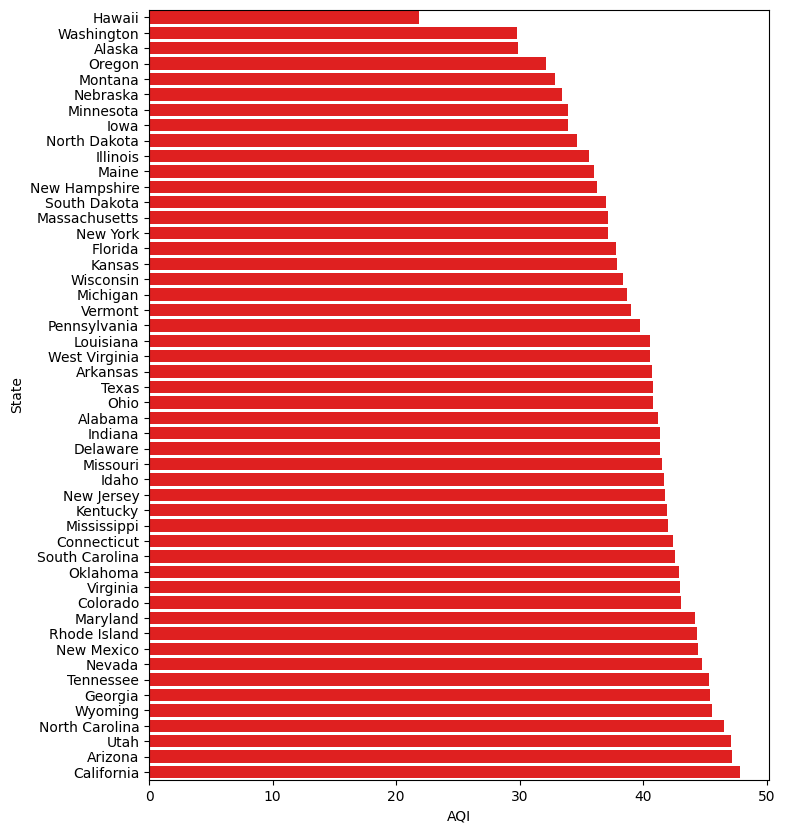

In [ ]:
#@title Demo Cell, don't edit me, check your outcome with me! {display-mode: "form"}
df_mean_by_state = df_states.HW1.mean_by_state("AQI", "Ozone" ,pltbar=True)

In [ ]:
%%playground student
### This is your playground, do whatever test at here!

### This is your playground, do whatever test at here!

In [92]:
def mean_by_state(df_states, vname, pollutant, pltbar=True):
    """Compute the mean value of vname for the given pollutant in each state,
    and optionally plot a horizontal bar chart."""
    df_filtered = df_states[df_states['Parameter'] == pollutant]

    # Get the mean values as a Series
    mean_series = df_filtered.groupby('State')[vname].mean()

    # Convert to DataFrame with reset_index to make State a column
    df_mean = mean_series.reset_index()
    df_mean = df_mean.sort_values(by=vname)

    if pltbar:
        plt.figure(figsize=(8, ))
        plt.barh(df_mean['State'], df_mean[vname])
        plt.xlabel(vname)
        plt.gca().invert_yaxis()

    return df_mean

### Task 1.2 grading section, **<font color='red'>DO NOT</font>** edit me, answer in the above cell!

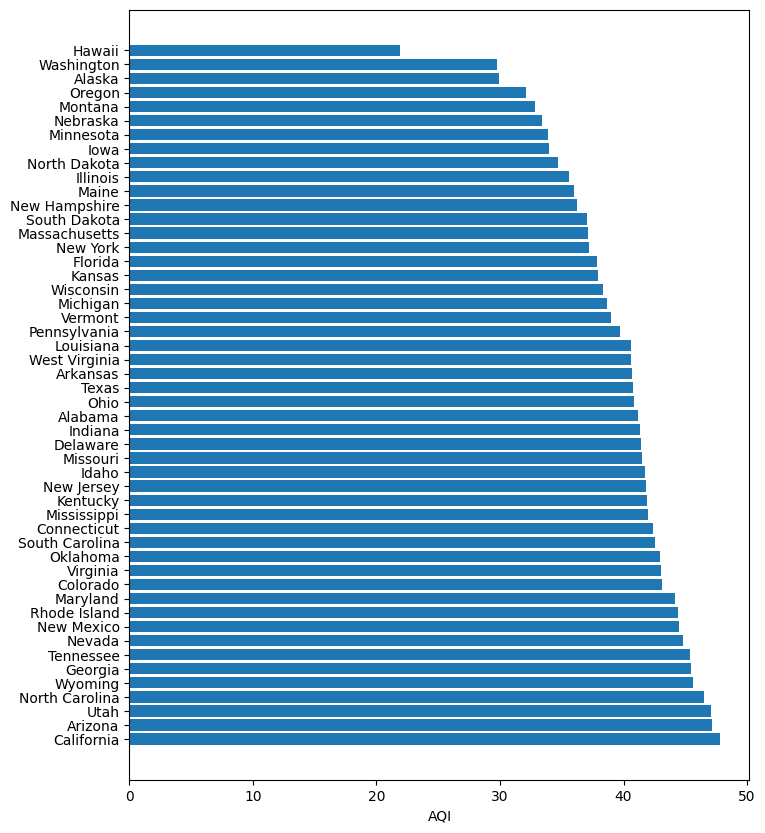

In [95]:
#@title Demo Cell, don't edit me, check your outcome with me! {display-mode: "form"}
df_mean_by_state = mean_by_state(df_states,"AQI", "Ozone" ,pltbar=True)

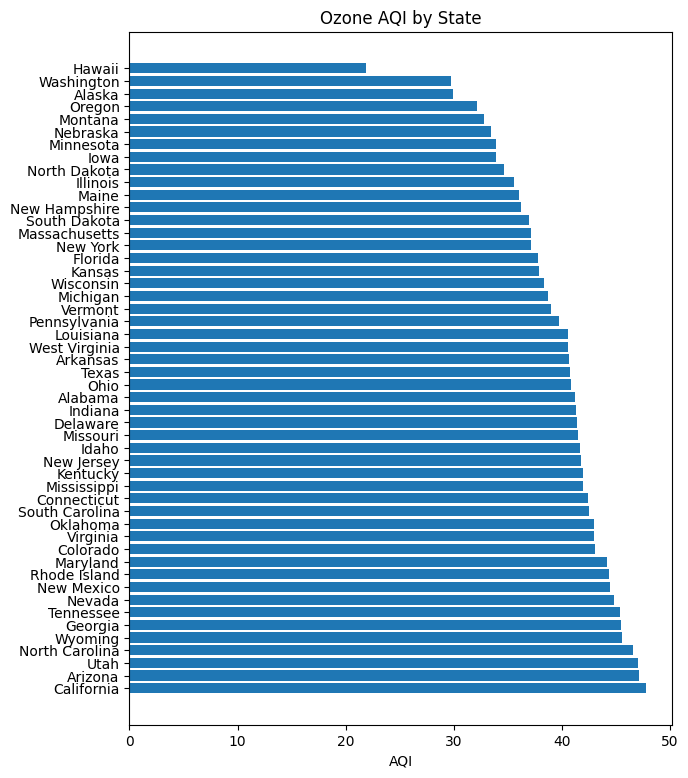

In [ ]:
#@title Grading Cell, don't edit me, otherwise you would have to input all code by yourself again! {display-mode: "form"}
with mles.clock_ticking(5):
    df_mean_by_state = mean_by_state(df_states,"AQI","Ozone",pltbar=True)

In [106]:
#@title Grading Cell, don't edit me, otherwise you would have to input all code by yourself again! {display-mode: "form"}
assert df_states.HW1.mean_by_state("AQI", "Ozone" ,pltbar=False).equals(
                                   mean_by_state(df_states,"AQI", "Ozone" ,pltbar=False) )
assert df_states.HW1.mean_by_state("Mean", "Ozone" ,pltbar=False).equals(
                                   mean_by_state(df_states,"Mean", "Ozone" ,pltbar=False) )

In [ ]:
#@title Grading Cell, don't edit me, otherwise you would have to input all code by yourself again! {display-mode: "form"}
checkit(mean_by_state,nmax=10,formax=0)

✅ Your function passes all constraints!


# **📊 Task 1.3: Temporal Correlation Between States**
```
               _ _                  __             
__      ___ __(_) |_ ___    __ _   / _|_   _ _ __  
\ \ /\ / / '__| | __/ _ \  / _` | | |_| | | | '_ \
 \ V  V /| |  | | ||  __/ | (_| | |  _| |_| | | | |
  \_/\_/ |_|  |_|\__\___|  \__,_| |_|  \__,_|_| |_|
                                                   
```

In this task, you will analyze the **correlation of air quality measurements** between different U.S. states for a **specific pollutant** over time.

You will **implement** a function called `corr_between_st()` to compute and visualize these correlations.

---

### **🔧 Function Definition**
```python
df_corr_between_st = corr_between_st(df_states, vname, pollutant, pltbar=True)
```

### **📥 Function Arguments**
1. **`df_states`** → A DataFrame containing daily state-level air quality data.
2. **`vname`** → The feature to analyze (`"AQI"` or `"Mean"`).
3. **`pollutant`** → The pollutant to analyze (e.g., `"Ozone"`).
4. **`pltbar`** (optional) → A Boolean flag indicating whether to generate a **clustered heatmap** (**default: `True`**).

---

### **📤 Expected Output**
Your function should return a **DataFrame** containing the **temporal correlation coefficients** for all possible **state pairs** based on the selected pollutant and feature.

If `pltbar=True`, the function should generate a **clustered heatmap** displaying correlation values between states:
- **Color scale range**: `vmin=-0.6, vmax=0.6`
- **High correlation (closer to 1)** → States have similar trends.
- **Low correlation (closer to -1)** → States have opposite trends.

---

## **⚠️ Important Constraints**
✅ **Avoid using loops** (Use Pandas/Numpy vectorized operations).  
✅ **Your code should be ≤ 10 lines long**.  
✅ **Execution time should be ≤ 5 seconds**.  

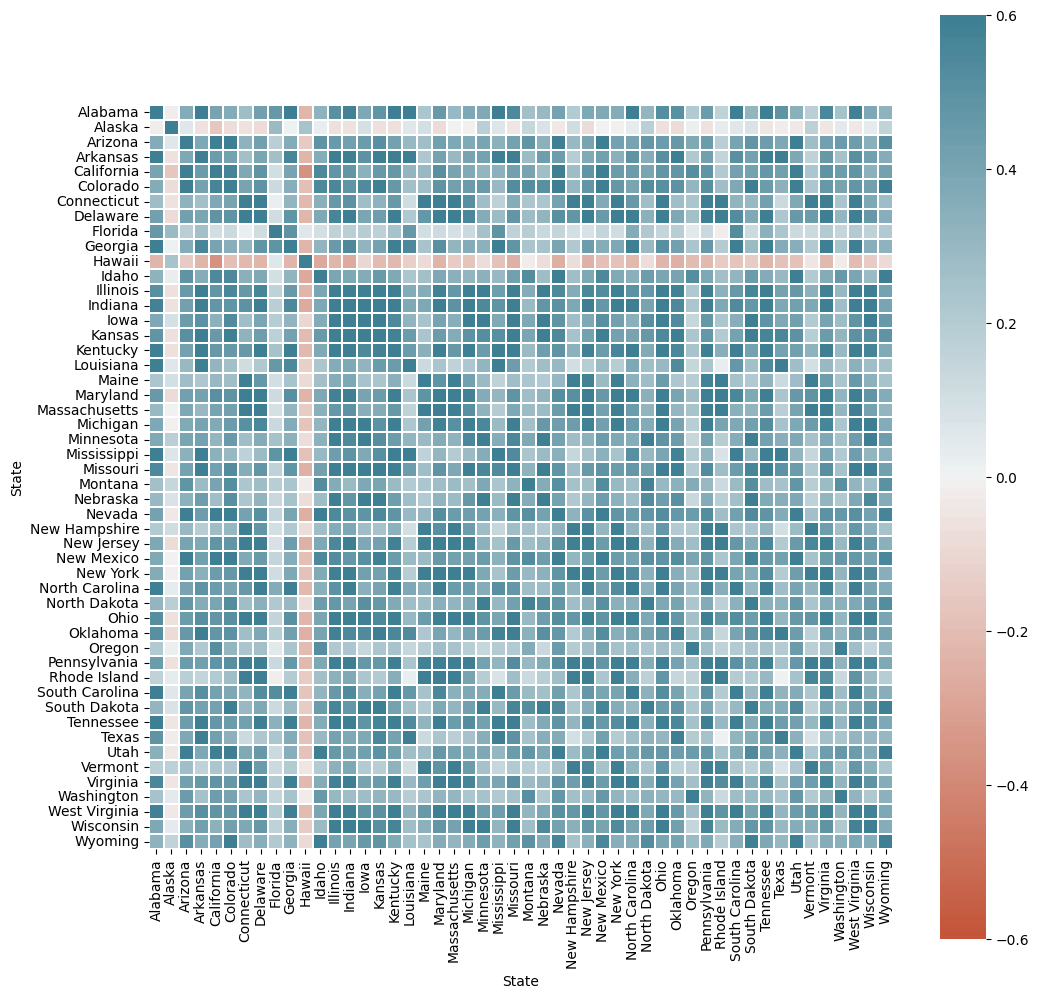

In [96]:
#@title Demo Cell, don't edit me, check your outcome with me! {display-mode: "form"}
df_corr_between_st = df_states.HW1.corr_between_st("AQI","Ozone",pltbar=True)

In [104]:
#lecture 12
def corr_between_st(df_states,vname,pollutant,pltbar=True):
    df_filtered = df_states[df_states['Parameter'] == pollutant]

    # Use pivot to reshape the data with dates as index and states as columns
    df_pivot = df_filtered.pivot(index='Date', columns='State', values=vname)

    # Calculate correlation between states
    corr_matrix = df_pivot.corr()

    # Plot clustered heatmap if requested
    if pltbar:
        plt.figure(figsize=(10, 8))
        sns.clustermap(corr_matrix, vmin=-0.6, vmax=0.6, cmap='coolwarm')
        plt.xlabel('State')
        plt.ylabel('State')

    return corr_matrix


In [ ]:
%%playground student
### This is your playground, do whatever test at here!

### This is your playground, do whatever test at here!

### Task 1.3 grading section, **<font color='red'>DO NOT</font>** edit me, answer in the above cell!

<Figure size 1000x800 with 0 Axes>

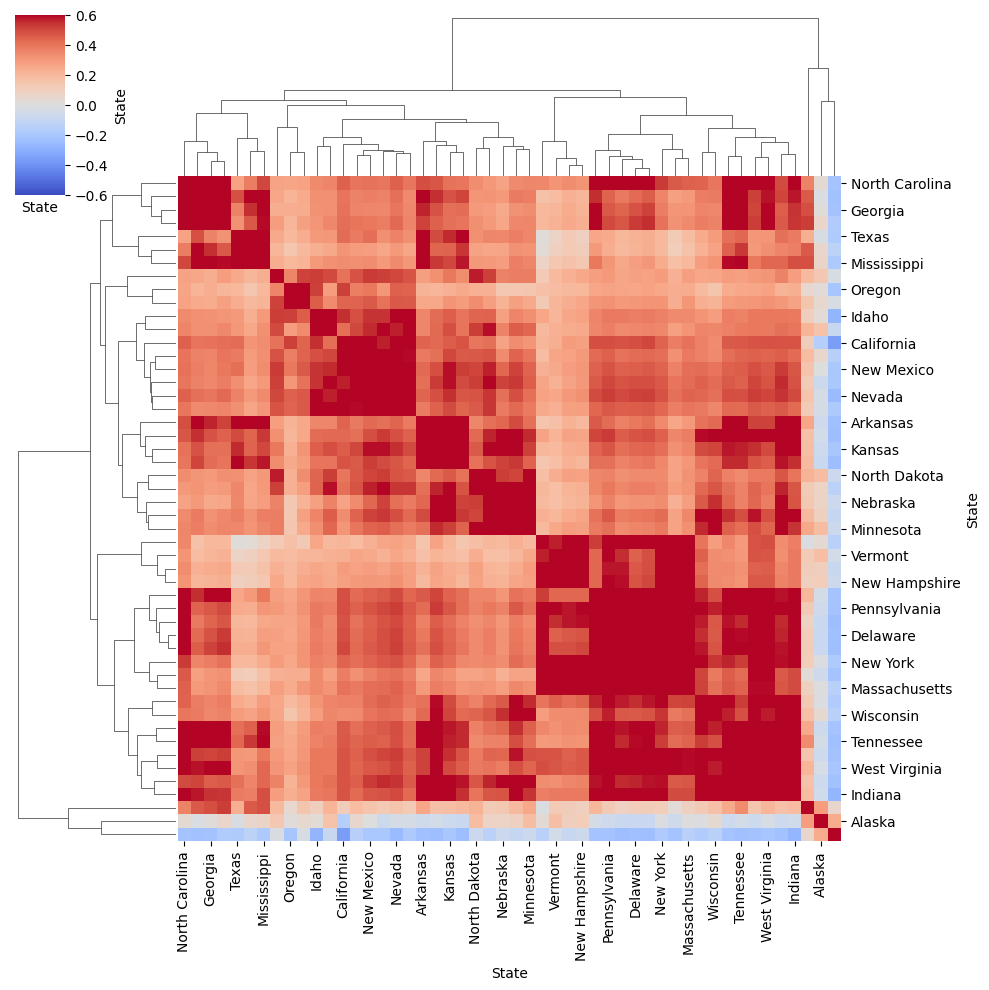

In [107]:
#@title Grading Cell, don't edit me, otherwise you would have to input all code by yourself again! {display-mode: "form"}
with mles.clock_ticking(5):
    df_corr_between_st = corr_between_st(df_states,"AQI","Ozone",pltbar=True)

In [101]:
#@title Grading Cell, don't edit me, otherwise you would have to input all code by yourself again! {display-mode: "form"}
#df_corr_between_st = mles.corr_between_st(df_states,"AQI","Ozone",pltbar=True)
assert df_states.HW1.corr_between_st("Mean","Ozone",pltbar=False
                                    ).equals(corr_between_st(df_states,"Mean","Ozone",pltbar=False))

In [100]:
#@title Grading Cell, don't edit me, otherwise you would have to input all code by yourself again! {display-mode: "form"}
checkit(corr_between_st,nmax=10,formax=0)

✅ Your function passes all constraints!


# **📊 Task 1.4: AQI Quality Categorization**

```
               _ _                  __             
__      ___ __(_) |_ ___    __ _   / _|_   _ _ __  
\ \ /\ / / '__| | __/ _ \  / _` | | |_| | | | '_ \
 \ V  V /| |  | | ||  __/ | (_| | |  _| |_| | | | |
  \_/\_/ |_|  |_|\__\___|  \__,_| |_|  \__,_|_| |_|
                                                   
```


In this task, you will classify AQI values into **health concern categories** and visualize the distribution for a **specific state and pollutant**.

You will **implement** a function called `aqi_quality()` to perform this analysis.

---

### **🔧 Function Definition**
```python
s_quality = aqi_quality(df_states, pollutant, statename,
                pltpie=True, explode=None,
                bins=[0, 50, 100, 150, 200, 300, 500],
                lb=['Good', 'Moderate', 'Unhealthy for Sensitive Groups',
                    'Unhealthy', 'Very Unhealthy', 'Hazardous'])
```

### **📥 Function Arguments**
1. **`df_states`** → A DataFrame containing daily state-level air quality data.
2. **`pollutant`** → The pollutant to analyze (e.g., `"Ozone"`).
3. **`statename`** → The U.S. state to analyze (e.g., `"Maryland"`).
4. **`pltpie`** (optional) → Boolean flag indicating whether to generate a **pie chart** (**default: `True`**).
5. **`explode`** (optional) → A tuple to adjust pie chart aesthetics.
6. **`bins`** (optional) → The AQI bin ranges based on health concern levels.
7. **`lb`** (optional) → Labels for each AQI bin range.

---

### **📤 Expected Output**
Your function should return a **Pandas Series** containing **counts of AQI quality levels** for the selected state.  

Example Output (**AQI Quality for Maryland**):
|                                |   Maryland |
|:-------------------------------|-----------:|
| Good                           |       9263 |
| Moderate                       |       2248 |
| Unhealthy for Sensitive Groups |        649 |
| Unhealthy                      |        184 |
| Very Unhealthy                 |         13 |
| Hazardous                      |          0 |

If `pltpie=True`, the function should generate a **pie chart** showing the **percentage of each AQI level**.

---

## **⚠️ Important Constraints**
✅ **Avoid using loops** (Use Pandas vectorized operations).  
✅ **Your code should be ≤ 7 lines long**.  
✅ **Execution time should be ≤ 5 seconds**.  

---

## **📊 AQI Health Concern Levels**
The AQI (Air Quality Index) is categorized into **six levels of health concern**:

| **AQI Values**   | **Health Concern Level**                    |
|------------------|------------------------------------------|
| 0 - 50          | Good                                      |
| 51 - 100        | Moderate                                  |
| 101 - 150       | Unhealthy for Sensitive Groups           |
| 151 - 200       | Unhealthy                                |
| 201 - 300       | Very Unhealthy                           |
| 301 - 500       | Hazardous                                |



In [ ]:
#@title Demo Cell, don't edit me, check your outcome with me! {display-mode: "form"}
f, ax = plt.subplots(figsize=(10, 15))
quality_count = df_states.HW1.aqi_quality("Ozone","Maryland",True, ( 0,0, 0.2,0.6,0.9) )

In [ ]:
#HINT lecture 06
def aqi_quality(df_i,pollutant,statename,
                pltpie=True,explode=None,
                bins = [0,50,100,150,200,300,500],
                lb=['Good','Moderate','Unhealthy for Sensitive Groups',
                    'Unhealthy','Very Unhealty','Hazards']):
    # YOUR CODE HERE
    raise NotImplementedError()


In [ ]:
%%playground student
### This is your playground, do whatever test at here!

### This is your playground, do whatever test at here!

### Task 1.4 grading section, **<font color='red'>DO NOT</font>** edit me, answer in the above cell!

In [ ]:
#@title Grading Cell, don't edit me, otherwise you would have to input all code by yourself again! {display-mode: "form"}
with mles.clock_ticking(5):
    f, ax = plt.subplots(figsize=(10, 15))
    quality_count = aqi_quality(df_states,"Ozone","Maryland",True, ( 0,0, 0.2,0.6,0.9) )

In [ ]:
#@title Grading Cell, don't edit me, otherwise you would have to input all code by yourself again! {display-mode: "form"}

vname,state ="Ozone","Maryland"
assert df_states.HW1.aqi_quality(vname,state,False ).equals(aqi_quality(df_states,vname,state,False))

In [ ]:
#@title Grading Cell, don't edit me, otherwise you would have to input all code by yourself again! {display-mode: "form"}
checkit(aqi_quality,nmax=7,formax=0)

# **📊 Task 2.1: Daily Anomaly Calculation**
```
               _ _                  __             
__      ___ __(_) |_ ___    __ _   / _|_   _ _ __  
\ \ /\ / / '__| | __/ _ \  / _` | | |_| | | | '_ \
 \ V  V /| |  | | ||  __/ | (_| | |  _| |_| | | | |
  \_/\_/ |_|  |_|\__\___|  \__,_| |_|  \__,_|_| |_|
                                                   
```
In this task, you will compute **daily anomalies** for a given **pollutant** and **state** by comparing daily values to long-term climatological means.

You will **implement** a function called `get_anom()` to perform this analysis.

---

### **🔧 Function Definition**
```python
df_anom = get_anom(df_states, pollutant, statename, vname, pltline=True)
```

### **📥 Function Arguments**
1. **`df_states`** → A DataFrame containing daily state-level air quality data.
2. **`pollutant`** → The pollutant to analyze (e.g., `"Ozone"`).
3. **`statename`** → The U.S. state to analyze (e.g., `"Maryland"`).
4. **`vname`** → The feature to compute anomalies for (`"AQI"` or `"Mean"`).
5. **`pltline`** (optional) → A Boolean flag indicating whether to generate a **line plot** (**default: `True`**).

---

### **📤 Expected Output**
Your function should return a **Pandas Series** containing **daily anomalies** for the selected state and pollutant.

Example Output (**Ozone AQI Anomalies for Maryland**):
| Date                |   anom_daily |
|:--------------------|-------------:|
| 1986-01-01 00:00:00 |      2.95342 |
| 1986-01-02 00:00:00 |     -7.37114 |
| 1986-01-03 00:00:00 |     -3.53345 |
| 1986-01-04 00:00:00 |     -8.46124 |
| 1986-01-05 00:00:00 |     -2.87722 |

If `pltline=True`, the function should generate a **line plot** with:
- **X-axis** → Dates  
- **Y-axis** → Original daily mean vs. anomaly values  
- **Legend** → Differentiating between the raw daily mean and anomalies  

---

## **⚠️ Important Constraints**
✅ **Avoid using loops** (Use Pandas vectorized operations).  
✅ **Your code should be ≤ 10 lines long**.  
✅ **Leap years should be properly handled**.  
✅ **Execution time should be ≤ 5 seconds**.  
✅ **Comment on seasonality if present**.  

---

## **📌 Understanding Daily Climatology & Anomalies**
- **Daily mean climatology** refers to the **average of a given day's value across all years**.  
- The **anomaly** is computed as:
  \[
  \text{Anomaly} = \text{Daily Value} - \text{Climatological Daily Mean}
  \]
- **Leap Year Handling**:  
  - The Julian day number (Day of Year) is preferred for grouping.  
  - If using `"day + month"` for grouping, it will still be considered correct.


In [ ]:
#@title Demo Cell, don't edit me, check your outcome with me! {display-mode: "form"}
df_anom = df_states.HW1.get_anom("Ozone","Maryland",vname="AQI")

In [ ]:
%%playground student
### This is your playground, do whatever test at here!

### This is your playground, do whatever test at here!

In [ ]:
def get_anom(df_in,pollutant,statenames,vname,pltline=True):
    # YOUR CODE HERE
    raise NotImplementedError()

### Task 2.1 grading section, **<font color='red'>DO NOT</font>** edit me, answer in the above cell!

In [ ]:
#@title Grading Cell, don't edit me, otherwise you would have to input all code by yourself again! {display-mode: "form"}
with mles.clock_ticking(5):
    df_anom = get_anom(df_states,"Ozone","Maryland",vname="AQI")

# **📊 Task 2.2: Monthly Anomaly Contour Plot**

```
               _ _                  __             
__      ___ __(_) |_ ___    __ _   / _|_   _ _ __  
\ \ /\ / / '__| | __/ _ \  / _` | | |_| | | | '_ \
 \ V  V /| |  | | ||  __/ | (_| | |  _| |_| | | | |
  \_/\_/ |_|  |_|\__\___|  \__,_| |_|  \__,_|_| |_|
                                                   
```

In this task, you will **visualize air quality anomalies** for a **specific pollutant and state** using a **contour plot**.

You will **implement** a function called `Anom_Monthly_Contourf()` to generate this visualization.

---

### **🔧 Function Definition**
```python
Anom_Monthly_Contourf(df_states, pollutant, statename, vname, clevel=range(-40, 45, 5))
```

### **📥 Function Arguments**
1. **`df_states`** → A DataFrame containing daily state-level air quality data.
2. **`pollutant`** → The pollutant to analyze (e.g., `"Ozone"`).
3. **`statename`** → The U.S. state to analyze (e.g., `"Maryland"`).
4. **`vname`** → The feature to compute anomalies for (`"AQI"` or `"Mean"`).
5. **`clevel`** (optional) → Contour levels for visualization (**default: `range(-40, 45, 5)`**).

---

### **📤 Expected Output**
The function should **generate a contour plot** displaying anomaly variations by **month and year** for the selected state and pollutant.

The **X-axis** represents **months** (January to December).  
The **Y-axis** represents **years** in the dataset.  
The **contour colors** indicate **air quality anomaly levels**.

**🔍 Expected Insights from the Plot:**
- Positive anomalies (**warmer colors**) indicate **higher-than-normal** air quality values.
- Negative anomalies (**cooler colors**) indicate **lower-than-normal** air quality values.
- **Seasonal patterns** may emerge in different states and pollutants.

---

## **⚠️ Important Constraints**
✅ **No `for` loop!**. (Use Pandas/Numpy vectorized operations).  
✅ **Your code should be ≤ 10 lines long**.  
✅ **Execution time should be ≤ 5 seconds**.  
✅ **Leap years must be correctly handled**.  
✅ **The function should use the monthly mean of daily anomalies from Task 2.1**.  

---

## **📌 Understanding the Contour Plot**
- This plot **summarizes** air quality anomalies across years and months.
- The **upper-right corner may appear white**, which is expected due to missing data.
- **Leap years must be handled correctly**—assuming **365 days per year is incorrect**.



In [ ]:
#@title Demo Cell, don't edit me, check your outcome with me! {display-mode: "form"}
f, ax = plt.subplots(figsize=(23, 7))
#mles.mycplot(df_anom,"Maryland" )
df_states.HW1.Anom_Monthly_Contourf("Ozone","Maryland","AQI")

In [ ]:
def Anom_Monthly_Contourf(df_states,pollutant,statename,vname,clevel = range(-40,45,5)):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
%%playground student
### This is your playground, do whatever test at here!

### This is your playground, do whatever test at here!

### Task 2.2 grading section, **<font color='red'>DO NOT</font>** edit me, answer in the above cell!

In [ ]:
#@title Grading Cell, don't edit me, otherwise you would have to input all code by yourself again! {display-mode: "form"}

with mles.clock_ticking(5):
    f, ax = plt.subplots(figsize=(23, 7))
    Anom_Monthly_Contourf(df_states,"Ozone","Maryland","AQI")

In [ ]:
#@title Grading Cell, don't edit me, otherwise you would have to input all code by yourself again! {display-mode: "form"}
checkit(Anom_Monthly_Contourf,nmax=10,formax=0)

# **📊 Task 2.3: Monthly Mean and Variability Analysis**

```
               _ _                  __             
__      ___ __(_) |_ ___    __ _   / _|_   _ _ __  
\ \ /\ / / '__| | __/ _ \  / _` | | |_| | | | '_ \
 \ V  V /| |  | | ||  __/ | (_| | |  _| |_| | | | |
  \_/\_/ |_|  |_|\__\___|  \__,_| |_|  \__,_|_| |_|
                                                   
```

In this task, you will **analyze the monthly trends and fluctuations** of a **specific pollutant and state** using an **error-bar plot**.

You will **implement** a function called `Anom_Monthly_Contourf()` to generate this visualization.

---

### **🔧 Function Definition**
```python
Anom_Monthly_Contourf(df_states, pollutant, statename, vname)
```

### **📥 Function Arguments**
1. **`df_states`** → A DataFrame containing daily state-level air quality data.
2. **`pollutant`** → The pollutant to analyze (e.g., `"Ozone"`).
3. **`statename`** → The U.S. state to analyze (e.g., `"Maryland"`).
4. **`vname`** → The feature to compute (`"AQI"` or `"Mean"`).

---

### **📤 Expected Output**
The function should generate an **error-bar plot** that visualizes:
- The **monthly mean** of the selected feature.
- The **monthly standard deviation** as error bars.

This visualization will provide insights into:
- **General air quality trends over months**.
- **How much variation occurs within each month** (fluctuations).
- **Seasonal patterns** in pollutant levels.

---

## **⚠️ Important Constraints**
✅ **The function must be ≤ 20 lines long**.  
✅ **No `for` loop!**
✅ **Execution time must be ≤ 5 seconds**.  
✅ **Students must discuss observed trends in their analysis**.  

---

## **📌 Understanding the Error-Bar Plot**
- **Monthly means** summarize long-term air quality patterns.
- **Standard deviation bars** show how much values fluctuate each month.
- **Expected observations**:
  - Some pollutants (e.g., **Ozone**) may show **higher values in summer**.
  - Others (e.g., **PM2.5**) may peak in **winter** due to temperature inversions.



In [ ]:
#@title Demo Cell, don't edit me, check your outcome with me! {display-mode: "form"}
f, ax = plt.subplots(figsize=(23, 7))
df_states.HW1.Anom_Monthly_Errplot("Ozone","Maryland","AQI")

In [ ]:
def Anom_Monthly_Errplot(df_in,pollutant,statename,vname,
                         mk="o-", c="royalblue", ec="black", capsize=5):
    # YOUR CODE HERE
    raise NotImplementedError()


checkit(Anom_Monthly_Errplot,nmax=16,formax=0)

In [ ]:
%%playground student
### This is your playground, do whatever test at here!

### This is your playground, do whatever test at here!

### Task 2.3 grading section, **<font color='red'>DO NOT</font>** edit me, answer in the above cell!

In [ ]:
#@title Grading Cell, don't edit me, otherwise you would have to input all code by yourself again! {display-mode: "form"}

with mles.clock_ticking(5):
    f, ax = plt.subplots(figsize=(23, 7))
    Anom_Monthly_Errplot(df_states,"Ozone","Maryland","AQI")

In [ ]:
checkit(Anom_Monthly_Errplot,nmax=16,formax=0)

# **📊 Task 2.4: Seasonal Air Quality Analysis**

```
               _ _                  __             
__      ___ __(_) |_ ___    __ _   / _|_   _ _ __  
\ \ /\ / / '__| | __/ _ \  / _` | | |_| | | | '_ \
 \ V  V /| |  | | ||  __/ | (_| | |  _| |_| | | | |
  \_/\_/ |_|  |_|\__\___|  \__,_| |_|  \__,_|_| |_|
                                                   
```

In this task, you will analyze **seasonal variations** of a **specific pollutant** across different **states** and determine **which states have the best and worst air quality** for each season.

You will **implement** a function called `pollutant_by_seas()` to perform this analysis.

---

### **🔧 Function Definition**
```python
def pollutant_by_seas(df_in, pollutant, vname="AQI", plthist=True, season=3):
    ### Your code is here
    return df
```

### **📥 Function Arguments**
1. **`df_in`** → A DataFrame containing daily state-level air quality data.
2. **`pollutant`** → The pollutant to analyze (e.g., `"Ozone"`, `"PM2.5"`).
3. **`vname`** (optional) → The feature to compute (`"AQI"` or `"Mean"`, default: `"AQI"`).
4. **`plthist`** (optional) → A Boolean flag indicating whether to generate a **histogram** (**default: `True`**).
5. **`season`** (optional) → The season to analyze (**default: `3` for Summer**).

---

### **📤 Expected Output**
Your function should return a **DataFrame** identifying the states with the **best** and **worst** air quality for each season.

Example Output (**Ozone AQI Rankings**):
| **season** | **best**  | **worst**   |
|------------:|:---------|:-----------|
| 1 (Winter)  | Oregon   | Wyoming    |
| 2 (Spring)  | Hawaii   | Arizona    |
| 3 (Summer)  | Hawaii   | Maryland   |
| 4 (Autumn)  | Hawaii   | California |

If `plthist=True`, the function should generate a **histogram** comparing **AQI distributions** for:
- **Best state (lowest AQI)**
- **Worst state (highest AQI)**

---

## **⚠️ Important Constraints**
✅ **Your code should be ≤ 10 lines long**.  
✅ **Only one `for` loop is allowed**.  
✅ **Execution time should be ≤ 5 seconds**.  
✅ **Leap years must be properly handled**.  
✅ **Seasons must be correctly defined as follows**:  

| **Season** | **Months Included** |
|------------|---------------------|
| **Winter** | Dec - Jan - Feb *(DJF)* |
| **Spring** | Mar - Apr - May *(MAM)* |
| **Summer** | Jun - Jul - Aug *(JJA)* |
| **Autumn** | Sep - Oct - Nov *(SON)* |

---

## **📌 Seasonal Mean Calculation**
- The **seasonal mean value** should be computed based on the **monthly mean of the daily mean**.
- Ensure **correct handling of leap years** while determining the number of days per season.

---

## **📊 HINTS**
- **Winter does NOT start in January!** Be careful with seasonal grouping.
- **Use vectorized Pandas methods** to compute seasonal means efficiently.
- **Consider adding labels for states with the highest & lowest AQI**.


In [ ]:
#@title Demo Cell, don't edit me, check your outcome with me! {display-mode: "form"}
df = df_states.HW1.pollutant_by_seas("Ozone")

In [ ]:

def pollutant_by_seas(df_in,pollutant,vname="AQI",plthist=True,season=3):
    # YOUR CODE HERE
    raise NotImplementedError()

df=pollutant_by_seas(df_states,"Ozone")

In [ ]:
%%playground student
### This is your playground, do whatever test at here!
df = pollutant_by_seas(df_states,"Ozone")
### This is your playground, do whatever test at here!


### Task 2.4 grading section, **<font color='red'>DO NOT</font>** edit me, answer in the above cell!

In [ ]:
#@title Grading Cell, don't edit me, otherwise you would have to input all code by yourself again! {display-mode: "form"}

with mles.clock_ticking(1):
    df = pollutant_by_seas(df_states,"Ozone")

In [ ]:
#@title Grading Cell, don't edit me, otherwise you would have to input all code by yourself again! {display-mode: "form"}
assert df_states.HW1.pollutant_by_seas("Ozone",plthist=False
                                      ).equals(pollutant_by_seas(df_states,"Ozone",plthist=False))
checkit(pollutant_by_seas,nmax=25,formax=1)

tot_end = time.time()
print("total time to complete the notebook %s"%(tot_end-tot_start))

## Submission & Survey **Finally, please run the following cell and complete the survey to submit your assignment!**


In [ ]:
#@title RunMeAndCompleteThesurveyToSubmit! {display-mode: "form"}

# REMOVE THIS WHEN READY TO SUBMIT
# raise NotImplementedError

from IPython.display import IFrame
#https://docs.google.com/forms/d/e/1FAIpQLSf1pg_qbxqb54gv_RqAF3dzoAm8_g-Hw83MMmSmqob9yCvqgw/viewform?usp=sf_link
IFrame(src="https://docs.google.com/forms/d/e/1FAIpQLSf1pg_qbxqb54gv_RqAF3dzoAm8_g-Hw83MMmSmqob9yCvqgw/viewform?usp=sf_link", width='100%', height='500px')